# Problem 1 (Practice)

In HW 2 we studied the motion of a system of $N$ identical masses joined by identical linear springs like this:

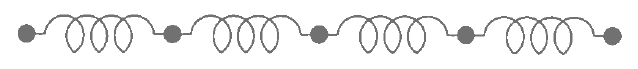

As we showed, the horizontal displacements $\xi_i$ of masses $i=1...N$ satisfy equations of motion
\begin{align*}
  m\frac{d^2\xi_1}{dt^2} &= k(\xi_2-\xi_1) + F_1, \\
  m\frac{d^2\xi_i}{dt^2} &= k(\xi_{i+1}-\xi_i) + k(\xi_{i-1}-\xi_i) + F_i, \\
  m\frac{d^2\xi_N}{dt^2} &= k(\xi_{N-1}-\xi_N) + F_N,
\end{align*}
where $m$ is the mass, $k$ is the spring constant, and $F_i$ is the external force on mass $i$. In HW2, we showed how these equations could be solved by guessing a form for the solution and using a matrix method. Here we'll solve them more directly.

(a) Write a program to solve for the motion of the masses using the Leapfrog  method for the case we studied previously where $m=1$ and $k=6$, and the driving forces are zero except for $F_1 = \cos \omega t$ with $\omega=2$ (Do not worry about advancing position by a half timestep). Plot your solutions for the displacements $\xi_i$ of all the masses as a function of time from $t=0$ to $t=100$ on the same plot. (60 pts)

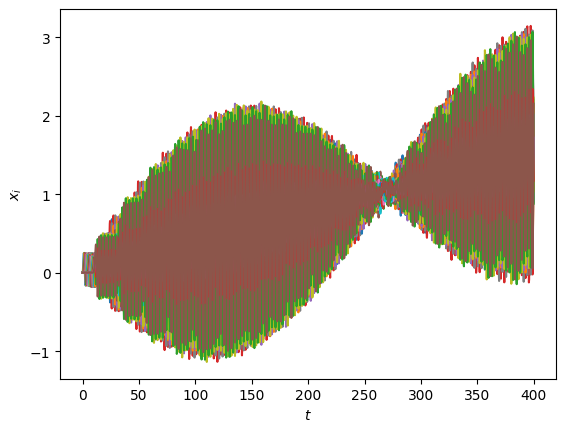

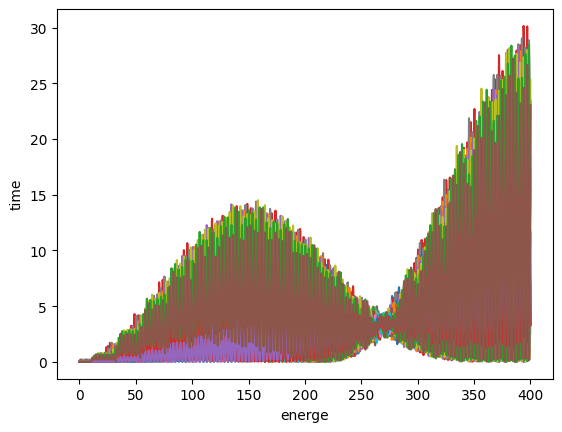

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# constant value are given in the problem
m=1
k=6
w=2
N=26
tmax=400
tsteps=2000
dt=tmax/tsteps

# define the leapfrog algorithm
# update v first, and use updated v to compute x
def leapfrog(f, x, v, t, dt):
    tempv = v + f(x,v,t)[1]*dt
    v = tempv
    tempx = x + f(x,v,t)[0]*dt
    return np.array([tempx, tempv])

# Define the equations of motion about spring system
def springs(x,v,t):
    dxdt = np.empty(len(x))
    dvdt = np.empty(len(v))
    dvdt[1:-1] = (k/m) * (x[2:] - 2*x[1:-1] + x[:-2])
    dvdt[0] = (k/m) * (x[1] - x[0]) + (np.cos(w*t)/m)
    dvdt[-1] = (k/m) * (x[-2] - x[-1])
    dxdt = v
    return dxdt, dvdt

# displacement and velocity arrays
r = [np.zeros(N), np.zeros(N)]
rpoints = []
tpoints = np.linspace(0, tmax, tsteps)
energy = []

for t in tpoints:
    rpoints.append(r)
    r = leapfrog(springs, r[0], r[1], t, dt)
    energy.append(0.5*(r[1]*r[1]+k*r[0]*r[0]))

rpoints = np.array(rpoints)
# plot the displacement of all the N masses for all time steps, 
plt.plot(tpoints, rpoints[:,0,:])
plt.xlabel('$t$')
plt.ylabel('$x_i$')
plt.show()

plt.plot(tpoints, energy)
plt.xlabel('energe')
plt.ylabel('time')
plt.show()

#summation of ener

(b) Write a code to create an animation of the movement of the masses. [Hint: use the FuncAnimation function from the matplotlib.animation library.] (30 pts)

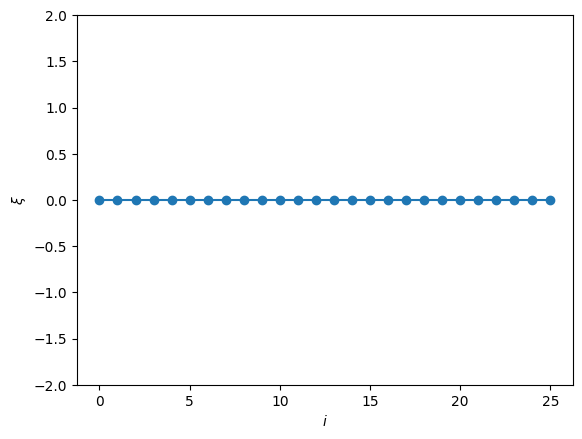

In [4]:
from matplotlib.animation import FuncAnimation
# create new figure and a set of subplots
fig,ax = plt.subplots()
# plot the initial state of the system at time t=0
points = ax.plot(np.arange(N), rpoints[0,0,:], marker='o')[0]
# set the y limits
ax.set_ylim([-2,2])
ax.set_xlabel('$i$')
ax.set_ylabel(r'$\xi$')
# update function for the animation
def update(t):
    points.set_ydata(rpoints[t,0,:])
# save the animation files
ani = FuncAnimation(fig=fig, func=update, frames=tsteps, interval=10)
ani.save('animation.mp4')

(c) Plot $\xi_i$ vs. i at the final time. Compare it to the solution you obtained in HW2. (10 pts)

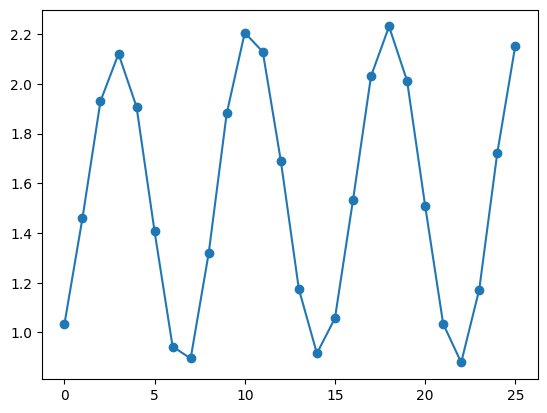

In [5]:
plt.plot(rpoints[-1,0,:], marker='o')

# In hw2, we assume the displacement as time-harmonic form and the time dependence is cancelled out.
# So, we have the steady-state results.
# But in hw4, we solve the equation using leapfrog method, so, we don't assume harmonic motion.
# So, in this result, we capture all the transient oscillation at t=100

---
# Problem 2

We wish to solve the Lorentz force equation, given by
\begin{align*}
  m\frac{d\mathbf{v}}{dt} = q(\mathbf{E} + \mathbf{v}\times\mathbf{B}).
\end{align*}
The Leapfrog scheme can be expressed as
\begin{align*}
  \frac{\mathbf{v}_{t+1}-\mathbf{v}_t}{\Delta t} = f\left(\frac{\mathbf{v}_{t+1}+\mathbf{v}_t}{2},t\right)
\end{align*}


(a) Define, the angular cyclotron frequency vector $\mathbf{\Omega} =q\mathbf{B}/m$ and the normalized electric field $\Sigma = q\mathbf{E}/m$ so that the above equation becomes
\begin{align}
  \frac{d\mathbf{v}}{dt} = \mathbf{\Sigma} + \mathbf{v}\times\mathbf{\Omega}.
\end{align}
Invoke the Leapfrog algorithm to show that the above equation becomes
\begin{align*}
  \mathbf{v}_{t+1}+\mathbf{A}\times\mathbf{v}_{t+1} = \mathbf{C}
\end{align*}
where $\mathbf{A} = \mathbf{\Omega}\Delta t/2
  ,$ and $\mathbf{C} = \mathbf{v}_t + \Delta t (\mathbf{\Sigma} + \mathbf{v}_t \times \mathbf{\Omega}/2)$. (15 pts)


$\rule{20cm}{0.4pt}$

$\text{We have the Lorentz equation and representation about normalized fields}$

$$
m\,\frac{d\mathbf v}{dt}=q\big(\mathbf E+\mathbf v\times\mathbf B\big),\quad
\boldsymbol\Omega:=\frac{q}{m}\mathbf B,\quad
\boldsymbol\Sigma:=\frac{q}{m}\mathbf E,\quad
\frac{d\mathbf v}{dt}=\boldsymbol\Sigma+\mathbf v\times\boldsymbol\Omega
$$

$\text{Apply the Leapfrog to given ODE then,}$
$$
\frac{\mathbf v_{t+1}-\mathbf v_t}{\Delta t} = \boldsymbol\Sigma+\left(\frac{\mathbf v_{t+1}+\mathbf v_t}{2}\right)\times\boldsymbol\Omega
$$

$\text{We must expand the expression}$
$$
\mathbf v_{t+1}-\mathbf v_t = \Delta t\,\boldsymbol\Sigma+\frac{\Delta t}{2}\Big(\mathbf v_{t+1}\times\boldsymbol\Omega+\mathbf v_t\times\boldsymbol\Omega\Big)
$$

$$
\mathbf v_{t+1}-\frac{\Delta t}{2}\big(\mathbf v_{t+1}\times\boldsymbol\Omega\big) = \mathbf v_t+\Delta t\,\boldsymbol\Sigma+\frac{\Delta t}{2}\,\mathbf v_t\times\boldsymbol\Omega
$$

$$
\mathbf v_{t+1}+\frac{\Delta t}{2}\,\boldsymbol\Omega\times\mathbf v_{t+1} = \mathbf v_t+\Delta t\left(\boldsymbol\Sigma+\frac{1}{2}\,\mathbf v_t\times\boldsymbol\Omega\right)
$$

$\text{Let}$ $\mathbf A$ $\text{be}$ $\boldsymbol\Omega\,\frac{\Delta t}{2}$ $\text{and}$ $\mathbf C$ $\text{be}$ $\mathbf v_t+\Delta t\left(\boldsymbol\Sigma+\frac{1}{2}\,\mathbf v_t\times\boldsymbol\Omega\right)$ $\text{then,}$

$\text{We have}$
$$
\mathbf v_{t+1}+\mathbf A\times\mathbf v_{t+1}=\mathbf C
$$

$\rule{20cm}{0.4pt}$

(b) By first dotting the above equation with $\mathbf{A}$ and then crossing it with $\mathbf{A}$, show that the new value of velocity is given by
\begin{align*}
  \mathbf{v}_{t+1} = \frac{\mathbf{C} + \mathbf{A}(\mathbf{A}\cdot\mathbf{C}) - \mathbf{A}\times\mathbf{C}}{1+A^2}
\end{align*}
The position is then simply
\begin{align*}
  \mathbf{x}_{t+3/2} = \mathbf{x}_{t+1/2}+\mathbf{v}_{t+1}\Delta t
\end{align*}

(15 pts)

$\rule{20cm}{0.4pt}$

$\text{Multiply cross product of A to both side of given equation}$
$$
\mathbf v_{t+1}+\mathbf A\times\mathbf v_{t+1}=\mathbf C
$$

$$
\mathbf A\times\mathbf v_{t+1}
+\mathbf A\times(\mathbf A\times\mathbf v_{t+1})
=\mathbf A\times\mathbf C
$$

$\text{We expand it using BAC-CAB rule}$

$$
\mathbf A\times(\mathbf A\times\mathbf v_{t+1})
= (\mathbf A\cdot\mathbf v_{t+1})\mathbf A - (\mathbf A\cdot\mathbf A) \mathbf v_{t+1}
= \mathbf A (\mathbf A\cdot\mathbf v_{t+1}) - A^2\mathbf v_{t+1}
$$

$\text{Then}$

$$
\mathbf A\times\mathbf v_{t+1}
+\mathbf A(\mathbf A\cdot\mathbf v_{t+1})
-A^2\mathbf v_{t+1}
=\mathbf A\times\mathbf C
$$

$\text{From the original equation,}$

$$
\mathbf A\times\mathbf v_{t+1}=\mathbf C-\mathbf v_{t+1}
$$

$\text{Next, multiply dot product of A to both side}$
$$
\mathbf v_{t+1}+\mathbf A\times\mathbf v_{t+1}=\mathbf C
$$

$$
\mathbf A \cdot \mathbf v_{t+1} + \mathbf A \cdot (\mathbf A\times\mathbf v_{t+1})
=
\mathbf A \cdot \mathbf C
$$

$\text{Since divergence of the curl of any sufficiently smooth vector field is always zero}$

$$
\mathbf A\cdot\mathbf v_{t+1}=\mathbf A\cdot\mathbf C
$$

$\text{Thus, we have}$

$$
\mathbf C-\mathbf v_{t+1}
+\mathbf A(\mathbf A\cdot\mathbf C)
-A^2\mathbf v_{t+1}
=\mathbf A\times\mathbf C.
$$

$$
-(1+A^2)\,\mathbf v_{t+1}
=\mathbf A\times\mathbf C-\mathbf C-\mathbf A(\mathbf A\cdot\mathbf C).
$$

$$
\mathbf v_{t+1}
=\frac{\mathbf C+\mathbf A(\mathbf A\cdot\mathbf C)-\mathbf A\times\mathbf C}{1+A^2}
$$


$\text{Positions are defined at half-integer time steps and velocities are defined at integer time steps. For v = dx/dt and over the time interval from t+1/2 to t+3/2}$

$$
\mathbf{v}_{t+1}
= \frac{\mathbf{x}_{t+\tfrac{3}{2}} - \mathbf{x}_{t+\tfrac{1}{2}}}
{(t+\tfrac{3}{2})\Delta t - (t+\tfrac{1}{2})\Delta t}
$$

$$
\mathbf{v}_{t+1}
= \frac{\mathbf{x}_{t+\tfrac{3}{2}} - \mathbf{x}_{t+\tfrac{1}{2}}}
{\Delta t}
$$

$\text{Therefore, the position update at staggered half–steps is}$
$$
\mathbf x_{t+3/2}=\mathbf x_{t+1/2}+\mathbf v_{t+1}\,\Delta t.
$$

$\rule{20cm}{0.4pt}$

(c) Write a code that implements this algorithm for arbitrary $\mathbf{\Sigma}$ and $\mathbf{\Omega}$ [Hint: use the np.dot and np.cross functions]. Integrate the trajectory of a particle for $\mathbf{\Sigma}=(0,0,0)$ and $\mathbf{\Omega}=(0,0,1)$ from $t=0$ to $t=50$ and plot it on the $x-y$ plane for $\mathbf{x}(t=0)=(0,0,0)$ and $\mathbf{v}(t=0)=(0.1,0,0)$. Is the trajectory what you expect? Plot the energy of the particle as a function of time. Is it more or less conserved? (40 pts)

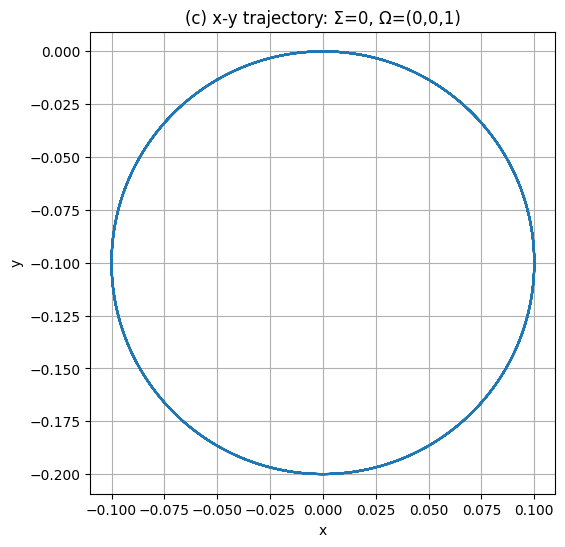

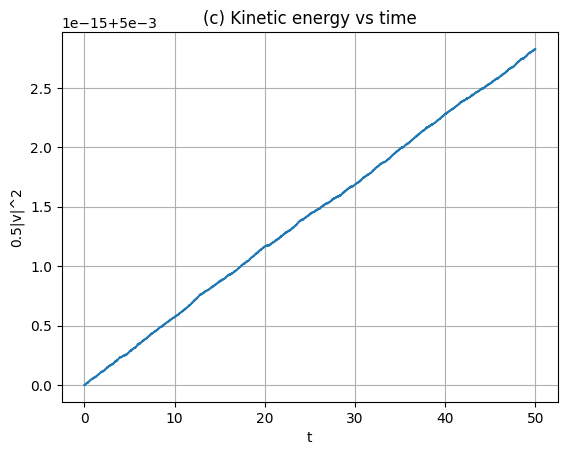

In [6]:
tmax = 50
tsteps = 5000
dt = tmax/tsteps
tpoints = np.linspace(0, tmax, tsteps)

def sigma_c(x, t):
    return np.array([0.0, 0.0, 0.0])

omega = np.array([0.0, 0.0, 1.0])

x0 = np.array([0.0, 0.0, 0.0])
v = np.array([0.1, 0.0, 0.0])
x = x0 + 0.5*dt*v

x_traj = []
y_traj = []
energies = []

for i in range(tsteps):
    x_traj.append(x[0])
    y_traj.append(x[1])
    energies.append(0.5*np.dot(v, v))
    A = 0.5*omega*dt
    C = v + dt*(sigma_c(x, tpoints[i]) + 0.5*np.cross(v, omega))
    v_new = (C + A*np.dot(A, C) - np.cross(A, C)) / (1+np.dot(A, A))
    x_new = x + v_new*dt
    v = v_new
    x = x_new

plt.figure(figsize=(6,6))
plt.plot(x_traj, y_traj)
plt.title("(c) x-y trajectory: Σ=0, Ω=(0,0,1)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.grid(True)

plt.figure()
plt.plot(tpoints, energies)
plt.title("(c) Kinetic energy vs time")
plt.xlabel("t")
plt.ylabel("0.5|v|^2")
plt.grid(True)


(d) Change the electric field to $\mathbf{\Sigma}=(0.1,0,0)$ and initial velocity to $\mathbf{v}(t=0)=(0,0,0)$. What happens and what is the average velocity of the particle? Confirm that this average velocity has the magnitude $E/B$. This average particle motion is called "$\mathbf{E}\times\mathbf{B}$ drift" and is equal to $\mathbf{v}_E = \frac{\mathbf{E}\times\mathbf{B}}{B^2}$. (15 pts)

(d) <v> = [ 0.000378   -0.10036514  0.        ] |<v>| = 0.1003658549914103
(d) v_E = [ 0.  -0.1  0. ] |v_E| = 0.1


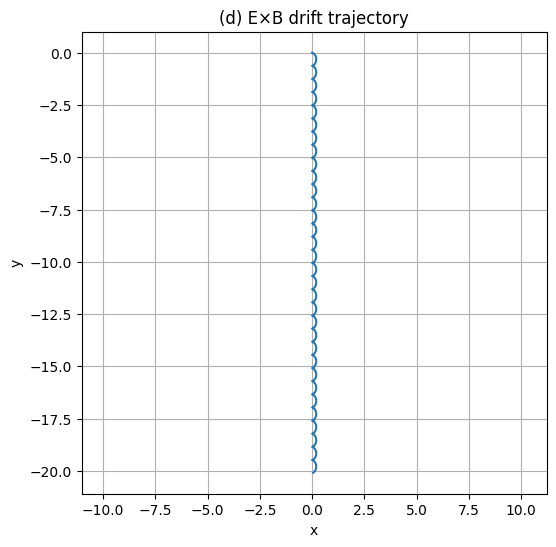

In [7]:
tmax = 200
tsteps = 20000
dt = tmax/tsteps
tpoints = np.linspace(0, tmax, tsteps)

Ex = 0.1
def sigma_d(x, t):
    return np.array([Ex, 0.0, 0.0])

omega = np.array([0.0, 0.0, 1.0])

x0 = np.array([0.0, 0.0, 0.0])
v = np.array([0.0, 0.0, 0.0])
x = x0 + 0.5*dt*v

x_traj = []
y_traj = []
vels = []

for i in range(tsteps):
    x_traj.append(x[0])
    y_traj.append(x[1])
    vels.append(v.copy())
    A = 0.5*omega*dt
    C = v + dt*(sigma_d(x, tpoints[i]) + 0.5*np.cross(v, omega))
    v_new = (C + A*np.dot(A, C) - np.cross(A, C)) / (1+np.dot(A, A))
    x_new = x + v_new*dt
    v = v_new
    x = x_new

v_avg = np.mean(np.array(vels)[len(vels)//2:], axis=0)
v_theory = np.cross(np.array([Ex,0.0,0.0]), omega)/np.dot(omega, omega)
print("(d) <v> =", v_avg, "|<v>| =", np.linalg.norm(v_avg))
print("(d) v_E =", v_theory, "|v_E| =", np.linalg.norm(v_theory))

plt.figure(figsize=(6,6))
plt.plot(x_traj, y_traj)
plt.title("(d) E×B drift trajectory")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.grid(True)

(e) Now change the electric field to $\mathbf{E} = (0,E_0\sin(ky-\omega t),0)$ for $E_0=0.1$, $k=1$ and $\omega=0.2$ and plot the particle trajectory in the $x-y$ plane. Now change $E_0=1.1$. Qualitative describe the difference between the two trajectories. For your information, in the latter case, the particle is actually undergoing chaotic motion (sensitive to initial conditions), and the criterion for this motion is
\begin{align*}
  \frac{mkE_0}{qB^2}>1
\end{align*}
(15 pts)

k*E0/|Ω|^2 = 0.1
k*E0/|Ω|^2 = 1.1


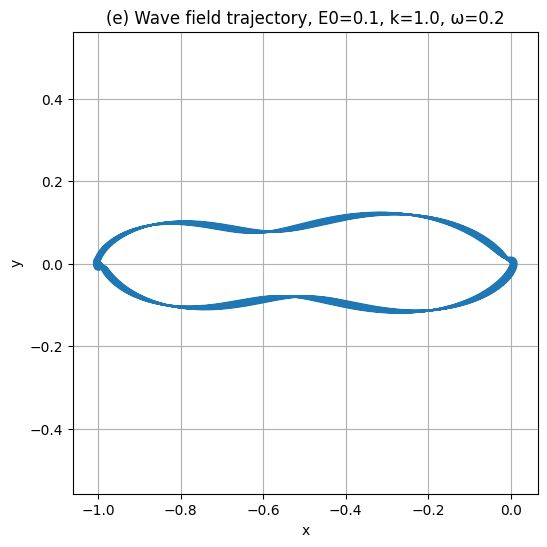

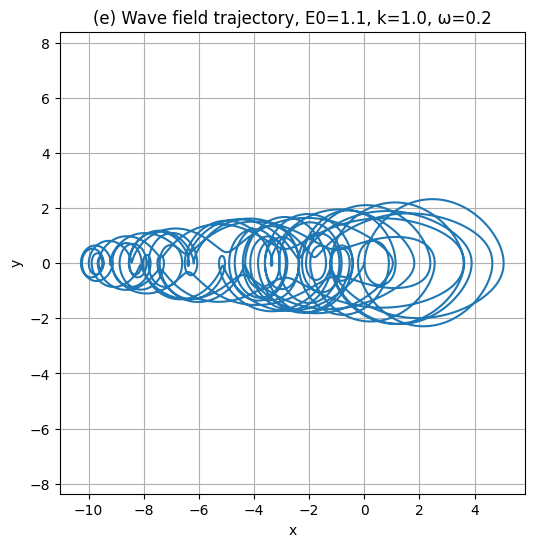

In [8]:
tmax = 300
tsteps = 30000
dt = tmax/tsteps
tpoints = np.linspace(0, tmax, tsteps)

k = 1.0
w = 0.2
omega = np.array([0.0, 0.0, 1.0])

def sigma_e(x, t, E0):
    return np.array([0.0, E0*np.sin(k*x[1] - w*t), 0.0])

for E0 in [0.1, 1.1]:
    x0 = np.array([0.0, 0.0, 0.0])
    v = np.array([0.0, 0.0, 0.0])
    x = x0 + 0.5*dt*v
    x_traj = []
    y_traj = []
    for i in range(tsteps):
        x_traj.append(x[0])
        y_traj.append(x[1])
        A = 0.5*omega*dt
        C = v + dt*(sigma_e(x, tpoints[i], E0) + 0.5*np.cross(v, omega))
        v_new = (C + A*np.dot(A, C) - np.cross(A, C)) / (1+np.dot(A, A))
        x_new = x + v_new*dt
        v = v_new
        x = x_new
    plt.figure(figsize=(6,6))
    plt.plot(x_traj, y_traj)
    plt.title(f"(e) Wave field trajectory, E0={E0}, k={k}, ω={w}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.axis("equal")
    plt.grid(True)
    print("k*E0/|Ω|^2 =", k*E0/np.dot(omega, omega))

plt.show()